In [1]:
# Data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

url = 'http://hilpisch.com/aiif_eikon_eod_data.csv'
raw = pd.read_csv(url, index_col=0, parse_dates=True)['EUR=']
raw.head()

Date
2010-01-01    1.4323
2010-01-04    1.4411
2010-01-05    1.4368
2010-01-06    1.4412
2010-01-07    1.4318
Name: EUR=, dtype: float64

<AxesSubplot:title={'center':'EUR/USD monthly'}, xlabel='Date'>

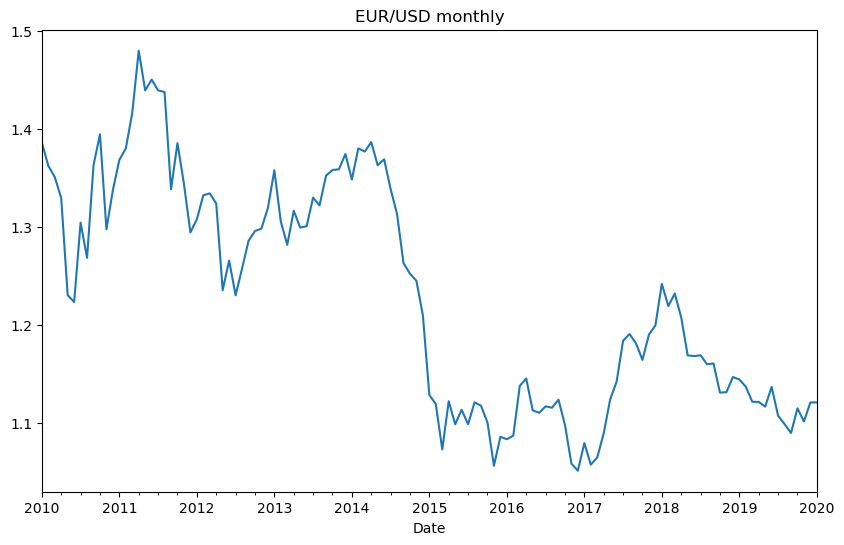

In [3]:
l = raw.resample('1M').last()
l.plot(figsize=(10,6), title='EUR/USD monthly')

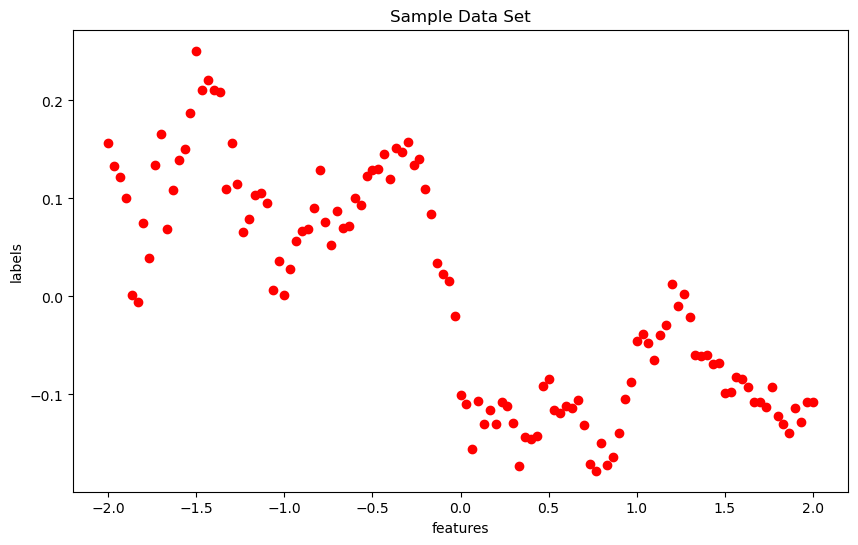

In [4]:
l = l.values
l -= l.mean()

f = np.linspace(-2, 2, len(l))

plt.figure(figsize=(10,6))
plt.plot(f, l, 'ro')
plt.title('Sample Data Set')
plt.xlabel('features')
plt.ylabel('labels')
plt.show();

[-0.01910626 -0.0147182   0.10990388  0.06007211 -0.20833598 -0.03275423]
0.0034166422957371025


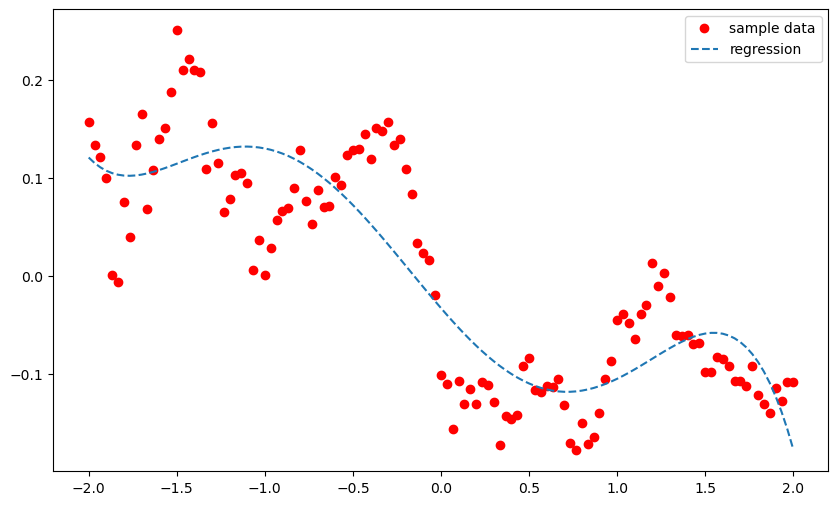

In [5]:
def MSE(l, p):
    return np.mean((l - p) ** 2)

reg = np.polyfit(f, l, deg=5)
print(reg)

p = np.polyval(reg, f)
print(MSE(l, p))

plt.figure(figsize=(10, 6))
plt.plot(f, l, 'ro', label='sample data')
plt.plot(f, p, '--', label='regression')
plt.legend()
plt.show();

In [6]:
for i in range(10, len(f) + 1, 20):
    reg = np.polyfit(f[:i], l[:i], deg=3)
    p = np.polyval(reg, f)
    mse = MSE(l, p)
    print(f'{i:3d} | MSE={mse}')

 10 | MSE=248628.10681707034
 30 | MSE=731.9382249304164
 50 | MSE=12.23608850500455
 70 | MSE=0.7410590619743298
 90 | MSE=0.005743061730409345
110 | MSE=0.006492800939555573


In [22]:
import tensorflow as tf
tf.random.set_seed(100)

from keras.layers import Dense
from keras.models import Sequential

model = Sequential()
model.add(Dense(256, activation='relu', input_dim=1))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='rmsprop')

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 256)               512       
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 769
Trainable params: 769
Non-trainable params: 0
_________________________________________________________________


In [23]:
%time model.fit(f, l, epochs=500, verbose=False)

CPU times: total: 8.03 s
Wall time: 5.53 s


In [24]:
p = model.predict(f).flatten()
MSE(l,p)

4/4 [==============================] - 0s 2ms/step


0.0020305961099462617

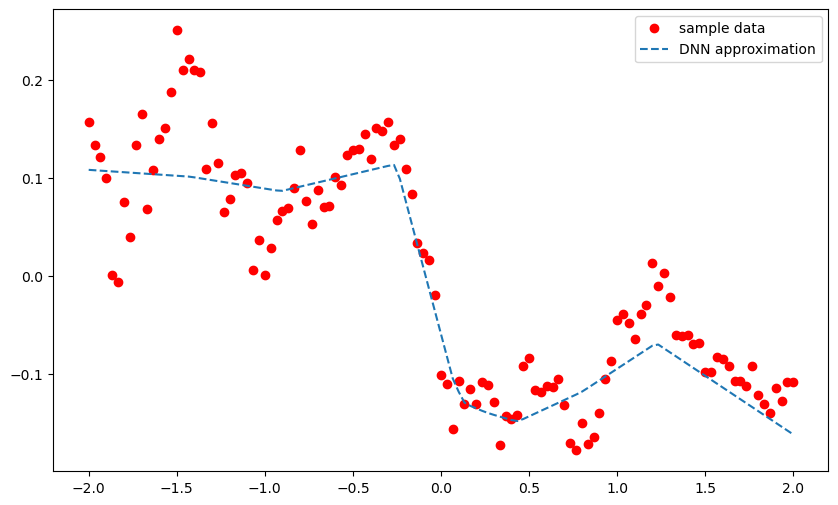

In [25]:
plt.figure(figsize=(10,6))
plt.plot(f, l, 'ro', label='sample data')
plt.plot(f, p, '--', label='DNN approximation')
plt.legend()
plt.show();

In [27]:
import pandas as pd

In [29]:
reg = {}
for d in range(1, 12, 2):
    reg[d] = np.polyfit(f, l, deg=d)
    p = np.polyval(reg[d], f)
    mse = MSE(l,p)
    print(f'{d:2d} | MSE={mse}')

 1 | MSE=0.005322474034260403
 3 | MSE=0.004353110724143184
 5 | MSE=0.0034166422957371025
 7 | MSE=0.0027389501772354012
 9 | MSE=0.0014119616263308416
11 | MSE=0.001265123786875228


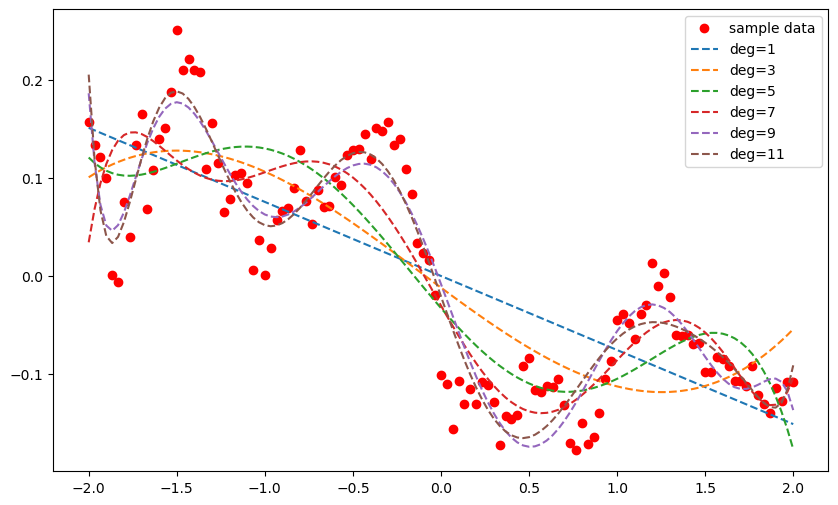

In [30]:
plt.figure(figsize=(10,6))
plt.plot(f, l, 'ro', label='sample data')
for d in reg:
    p = np.polyval(reg[d], f)
    plt.plot(f, p, '--', label=f'deg={d}')
plt.legend()
plt.show();

In [31]:
def create_dnn_model(hl=1, hu=256):
    ''' Function to create Keras DNN model.
    Parameters
    ==========
    hl: int
        number of hidden layers
    hu: int
        number of hidden units (per layer)
    '''
    model = Sequential()
    for _ in range(hl):
        model.add(Dense(hu, activation='relu', input_dim=1))
    model.add(Dense(1, activation='linear'))
    model.compile(loss='mse', optimizer='rmsprop')
    return model

In [32]:
model = create_dnn_model(3)
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 256)               512       
                                                                 
 dense_5 (Dense)             (None, 256)               65792     
                                                                 
 dense_6 (Dense)             (None, 256)               65792     
                                                                 
 dense_7 (Dense)             (None, 1)                 257       
                                                                 
Total params: 132,353
Trainable params: 132,353
Non-trainable params: 0
_________________________________________________________________


In [33]:
%time model.fit(f, l, epochs=500, verbose=False)

CPU times: total: 14.8 s
Wall time: 7.91 s


In [34]:
p = model.predict(f).flatten()
MSE(l, p)

4/4 [==============================] - 0s 3ms/step


0.0007020431260956206

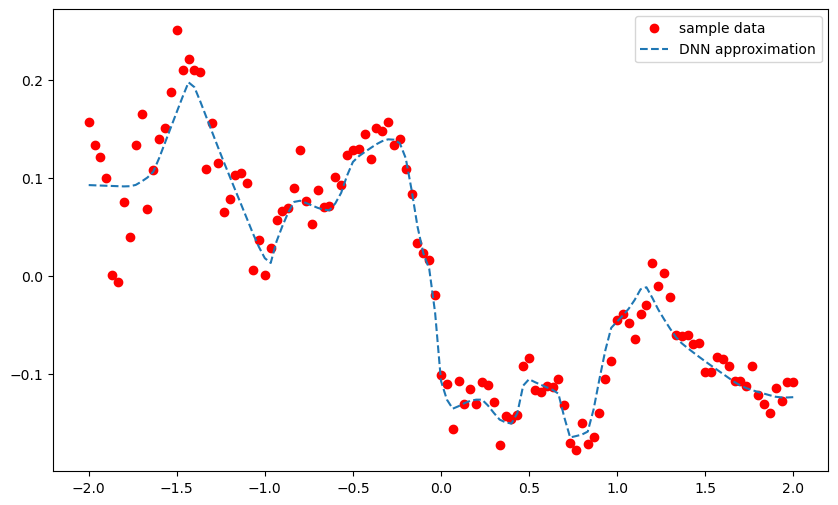

In [35]:
plt.figure(figsize=(10, 6))
plt.plot(f, l, 'ro', label='sample data')
plt.plot(f, p, '--', label='DNN approximation')
plt.legend()
plt.show();

In [36]:
te = int(0.25 * len(f))
va = int(0.25 * len(f))

np.random.seed(100)
ind = np.arange(len(f))
np.random.shuffle(ind)

ind_te = np.sort(ind[:te])
ind_va = np.sort(ind[te:te + va])
ind_tr = np.sort(ind[te + va:])

f_te = f[ind_te]
f_va = f[ind_va]
f_tr = f[ind_tr]

l_te = l[ind_te]
l_va = l[ind_va]
l_tr = l[ind_tr]

In [39]:
reg = {}
mse = {}
for d in range(1, 22, 4):
    reg[d] = np.polyfit(f_tr, l_tr, deg=d)
    p = np.polyval(reg[d], f_tr)
    mse_tr = MSE(l_tr, p)
    p = np.polyval(reg[d], f_va)
    mse_va = MSE(l_va, p)
    mse[d] = (mse_tr, mse_va)
    print(f'{d:2d} | MSE_tr={mse_tr:7.5f} | MSE_va={mse_va:7.5f}')

 1 | MSE_tr=0.00574 | MSE_va=0.00492
 5 | MSE_tr=0.00375 | MSE_va=0.00273
 9 | MSE_tr=0.00132 | MSE_va=0.00243
13 | MSE_tr=0.00094 | MSE_va=0.00183
17 | MSE_tr=0.00060 | MSE_va=0.00153
21 | MSE_tr=0.00046 | MSE_va=0.00837


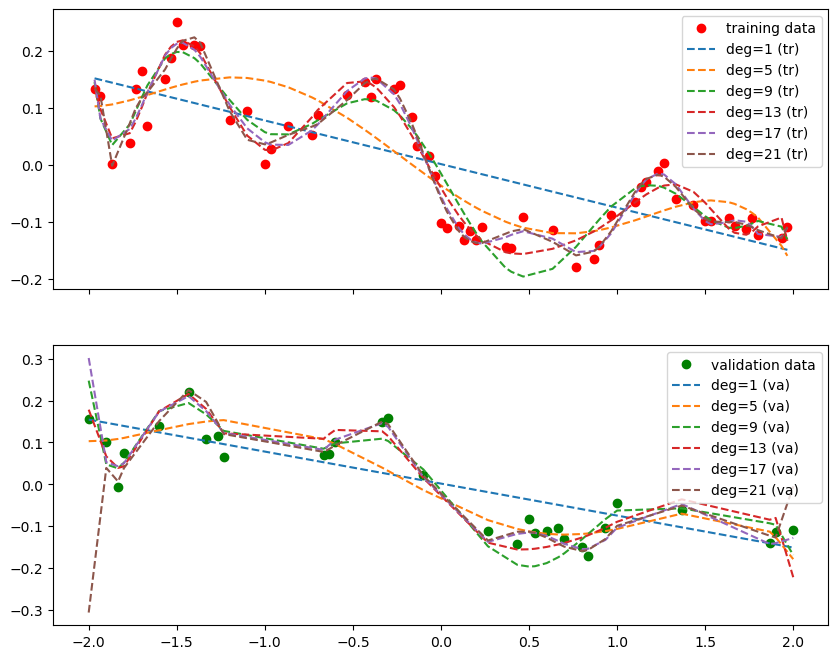

In [41]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8), sharex=True)
ax[0].plot(f_tr, l_tr, 'ro', label='training data')
ax[1].plot(f_va, l_va, 'go', label='validation data')
for d in reg:
    p = np.polyval(reg[d], f_tr)
    ax[0].plot(f_tr, p, '--', label=f'deg={d} (tr)')
    p = np.polyval(reg[d], f_va)
    plt.plot(f_va, p, '--', label=f'deg={d} (va)')
ax[0].legend()
ax[1].legend()
plt.show();

In [42]:
from keras.callbacks import EarlyStopping

model = create_dnn_model(2, 256)
callbacks = [EarlyStopping(monitor='loss',
                          patience=100,
                          restore_best_weights=True)]

In [43]:
%%time
model.fit(f_tr, l_tr, epochs=1000, verbose=False,
         validation_data=(f_va, l_va),
         callbacks=callbacks)

CPU times: total: 1min 6s
Wall time: 58.3 s


1/1 [==============================] - 0s 55ms/step


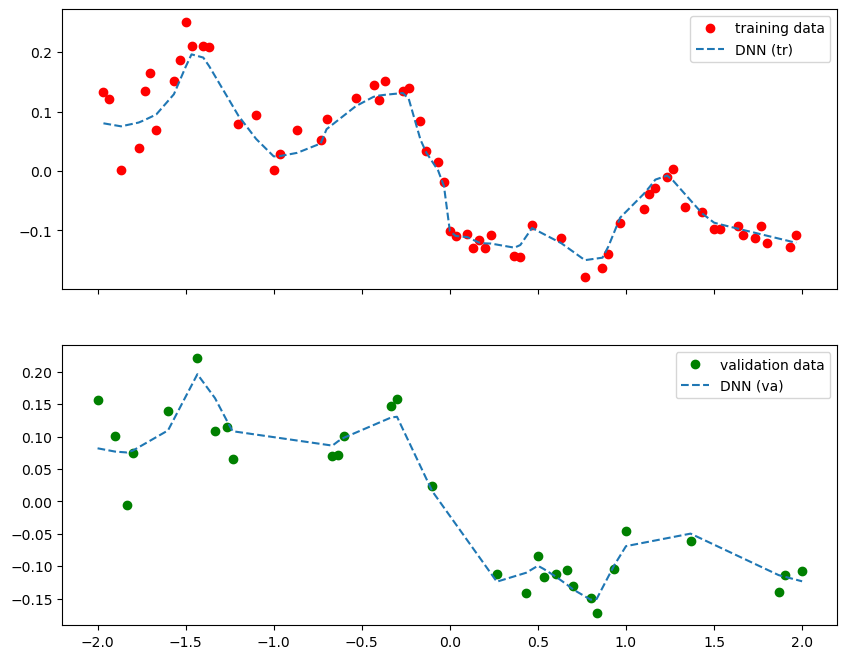

In [44]:
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(10, 8))
ax[0].plot(f_tr, l_tr, 'ro', label='training data')
p = model.predict(f_tr)
ax[0].plot(f_tr, p, '--', label=f'DNN (tr)')
ax[0].legend()
ax[1].plot(f_va, l_va, 'go', label='validation data')
p = model.predict(f_va)
ax[1].plot(f_va, p, '--', label=f'DNN (va)')
ax[1].legend();
plt.show();

1/1 [==============================] - 0s 29ms/step
0.003896034677102829
0.0009011635146970919


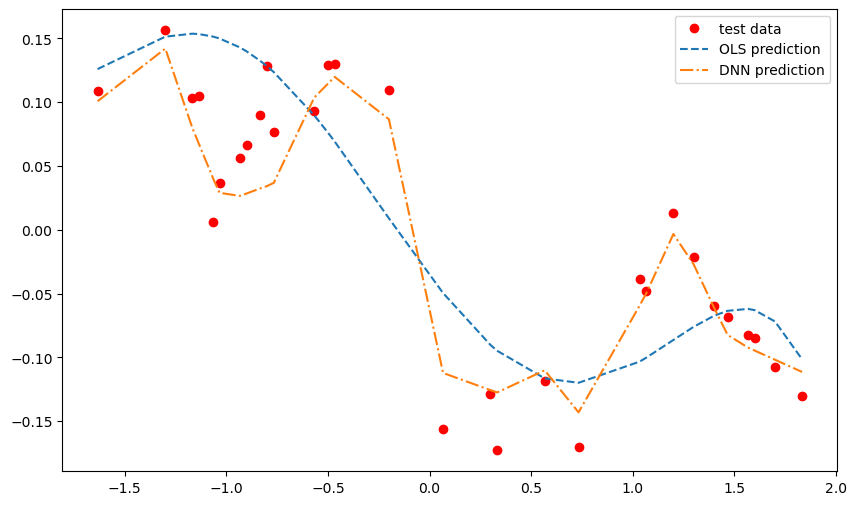

In [46]:
p_ols = np.polyval(reg[5], f_te)
p_dnn = model.predict(f_te).flatten()
print(MSE(l_te, p_ols))
print(MSE(l_te, p_dnn))

plt.figure(figsize=(10, 6))
plt.plot(f_te, l_te, 'ro', label='test data')
plt.plot(f_te, p_ols, '--', label='OLS prediction')
plt.plot(f_te, p_dnn, '-.', label='DNN prediction');
plt.legend()
plt.show();

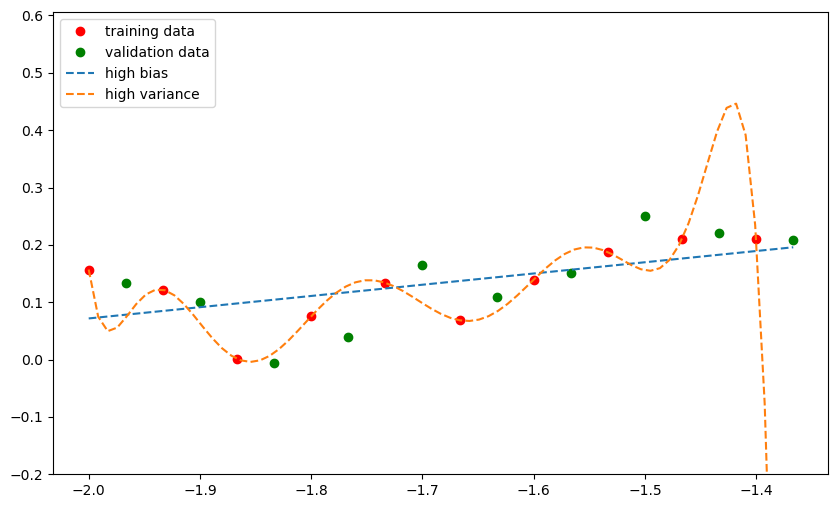

In [47]:
f_tr = f[:20:2]
l_tr = l[:20:2]

f_va = f[1:20:2]
l_va = l[1:20:2]

reg_b = np.polyfit(f_tr, l_tr, deg=1)
reg_v = np.polyfit(f_tr, l_tr, deg=9, full=True)[0]
f_ = np.linspace(f_tr.min(), f_va.max(), 75)

plt.figure(figsize=(10, 6))
plt.plot(f_tr, l_tr, 'ro', label='training data')
plt.plot(f_va, l_va, 'go', label='validation data')
plt.plot(f_, np.polyval(reg_b, f_), '--', label='high bias')
plt.plot(f_, np.polyval(reg_v, f_), '--', label='high variance')
plt.ylim(-0.2)
plt.legend(loc=2)
plt.show();

In [48]:
from sklearn.metrics import r2_score

def evaluate(reg, f, l):
    p = np.polyval(reg, f)
    bias = np.abs(l - p).mean()
    var = p.var()
    msg = f'MSE={MSE(l, p):.4f} | R2={r2_score(l, p):9.4f} |'
    msg += f'bias={bias:.4f} | var={var:.4f}'
    print(msg)

In [49]:
evaluate(reg_b, f_tr, l_tr)

MSE=0.0026 | R2=   0.3484 |bias=0.0423 | var=0.0014


In [50]:
evaluate(reg_b, f_va, l_va)

MSE=0.0032 | R2=   0.4498 |bias=0.0460 | var=0.0014


In [51]:
evaluate(reg_v, f_tr, l_tr)

MSE=0.0000 | R2=   1.0000 |bias=0.0000 | var=0.0040


In [52]:
evaluate(reg_v, f_va, l_va)

MSE=0.8753 | R2=-149.2779 |bias=0.3565 | var=0.7539


In [53]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=None, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                            LinearRegression(**kwargs))

np.set_printoptions(suppress=True, formatter={'float': lambda x: f'{x:12.2f}'})

In [54]:
print('\nCross-validation scores')
print(74 * '=')
for deg in range(0, 10, 1):
    model = PolynomialRegression(deg)
    cvs = cross_val_score(model, f.reshape(-1, 1), l, cv=5) 
    print(f'deg={deg} | ' + str(cvs.round(2)))


Cross-validation scores
deg=0 | [       -6.07        -7.34        -0.09        -6.32        -8.69]
deg=1 | [       -0.28        -1.40         0.16        -1.66        -4.62]
deg=2 | [       -3.48        -2.45         0.19        -1.57       -12.94]
deg=3 | [       -0.00        -1.24         0.32        -0.48       -43.62]
deg=4 | [     -222.81        -2.88         0.37        -0.32      -496.61]
deg=5 | [     -143.67        -5.85         0.49         0.12     -1241.04]
deg=6 | [    -4038.96       -14.71         0.49        -0.33      -317.32]
deg=7 | [    -9937.83       -13.98         0.64         0.22    -18725.61]
deg=8 | [    -3514.36       -11.22        -0.15        -6.29   -298744.18]
deg=9 | [    -7454.15        -0.91         0.15        -0.41    -13580.75]


In [55]:
np.random.seed(100)
tf.random.set_seed(100)
from keras.wrappers.scikit_learn import KerasRegressor

model = KerasRegressor(build_fn=create_dnn_model,
                        verbose=False, epochs=1000,
                        hl=1, hu=36)

C:\Users\hong9\AppData\Local\Temp\ipykernel_29432\723579057.py:5: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_dnn_model,


In [56]:
%time cross_val_score(model, f, l, cv=5)

CPU times: total: 1min 9s
Wall time: 53.1 s


array([       -0.02,        -0.01,        -0.00,        -0.00,
              -0.06])

In [57]:
model = KerasRegressor(build_fn=create_dnn_model,
                        verbose=False, epochs=1000,
                        hl=3, hu=256)

C:\Users\hong9\AppData\Local\Temp\ipykernel_29432\948354348.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasRegressor(build_fn=create_dnn_model,


In [58]:
%time cross_val_score(model, f, l, cv=5)

CPU times: total: 2min 17s
Wall time: 1min 9s


array([       -0.08,        -0.00,        -0.00,        -0.01,
              -0.03])